In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=7c8ab2ad169219204e9aa194f4c6b7c73084796fb6f49b11454f2ffe1a309f8d
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

import seaborn as sns

from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA

from scipy.spatial.distance import cdist, pdist

%matplotlib inline

In [ ]:
forest = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
forest.shape

(517, 13)

In [ ]:
forest.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


In [ ]:
 # Winter = 1, Spring = 2, Summer = 3, Fall = 4
 
 month_int_season = {
    'jan' : [1, "1"],
    'feb' : [2, "1"],
    'mar' : [3, "2"],
    'apr' : [4, "2"],
    'may' : [5, "2"],
    'jun' : [6, "3"],
    'jul' : [7, "3"],
    'aug' : [8, "3"],
    'sep' : [9, "4"],
    'oct' : [10, "4"],
    'nov' : [11, "4"],
    'dec' : [12, "1"]
}

forest["month_int_season"] = forest['month'].map(month_int_season) 
forest[['month_int','season']] = pd.DataFrame(forest.month_int_season.to_list())

forest = forest.sort_values(['month_int']).reset_index(drop=True)
forest = forest.drop(["month_int_season","month","day"], axis=1)

forest.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_int,season
0,2,4,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,1,1
1,4,5,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,1,1
2,3,4,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,2,1
3,2,2,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,2,1
4,7,4,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,2,1


In [ ]:
# month_int = {
#     'jan' : 1,
#     'feb' : 2,
#     'mar' : 3,
#     'apr' : 4,
#     'may' : 5,
#     'jun' : 6,
#     'jul' : 7,
#     'aug' : 8,
#     'sep' : 9,
#     'oct' : 10,
#     'nov' : 11,
#     'dec' : 12
# }

# day_int = {
#     'sun' : 1,
#     'mon' : 2,
#     'tue' : 3,
#     'wed' : 4,
#     'thu' : 5,
#     'fri' : 6,
#     'sat' : 7
# }

# forest["month_int"] = forest['month'].map(month_int) 
# forest = forest.sort_values(['month_int']).reset_index(drop=True)

# forest["day_int"] = forest['day'].map(day_int)
# forest = forest.sort_values(['day_int']).reset_index(drop=True)

# forest = forest.drop(['month','day'], axis=1)
# forest

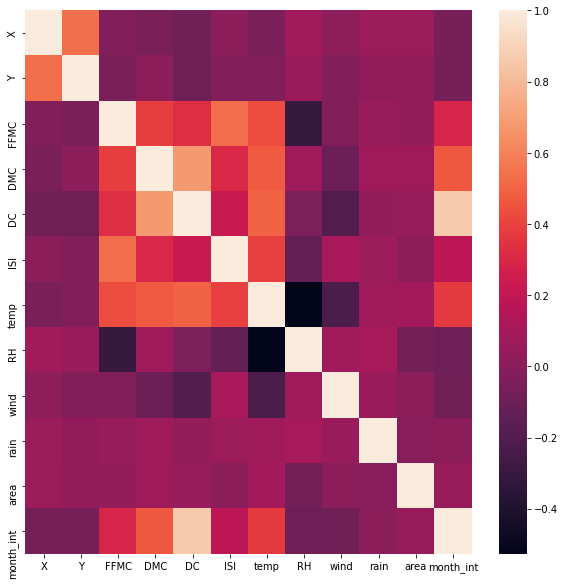

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(forest.corr())

In [ ]:
x = forest.drop(['season'], axis=1)
y = forest['season']

xTrain, xTest, yTrain, yTest = train_test_split(x, y)

xTrain = pd.get_dummies(xTrain)
xTest = pd.get_dummies(xTest)

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    1
513    1
514    1
515    1
516    1
Name: season, Length: 517, dtype: object

In [ ]:
# Helper function
def kmeans(x):
  kmeans = KMeans(n_clusters=2).fit(x)
  kmeans = pd.DataFrame(kmeans.labels_, columns=["cluster"])
  return kmeans

def pca(x, cluster):
  pca = PCA(n_components=2).fit(x)
  pcaTrans = pca.transform(x)
  pcaTransDf = pd.DataFrame(pcaTrans, columns=["pca1","pca2"])
  pca_means = pd.concat([cluster, pcaTransDf], axis=1)  
  return pca_means

def plot_normalizer_no_pca(cluster):
  fig = sns.lmplot(x="cluster", data=cluster, hue="cluster", fit_reg=False)
  plt.show()

def plot_normalizer_pca(pca_means, title):
  fig = sns.lmplot(x="pca1", y="pca2", data=pca_means, hue="cluster", fit_reg=False)
  plt.title(title)
  plt.show()



## KMeans Clustering

KeyError: ignored

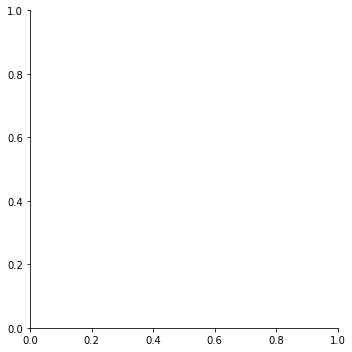

In [ ]:
# KMeans without PCA
normalizer = [StandardScaler(), MinMaxScaler(), Normalizer()]
norm_list = ['l1','l2','max']
title = ['StdScaler','MinMaxScaler','Normalizer(l1)','Normalizer(l2)','Normalizer(Max)']
transform = []

for i in normalizer:
  if i == normalizer[-1]:
    for j in norm_list:
      scaler = Normalizer(norm=j)
      X = scaler.fit_transform(xTrain)
      transform.append(kmeans(X))
      
  else:
      scaler = i
      X = scaler.fit_transform(xTrain)
      transform.append(kmeans(X))

transform


for index, i in enumerate(transform, start=0):
  plot_normalizer_no_pca(i) 


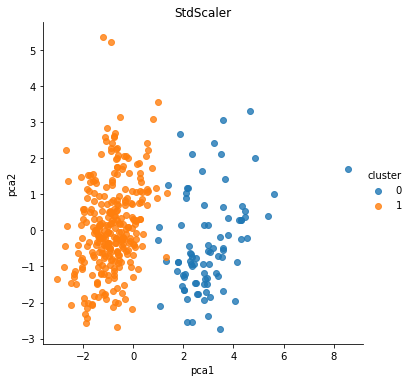

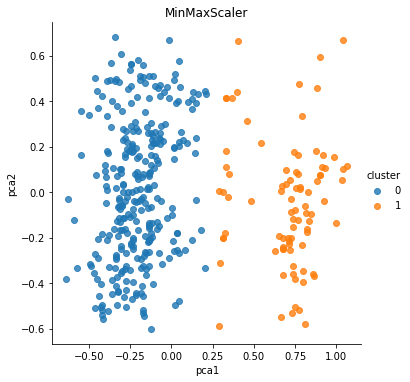

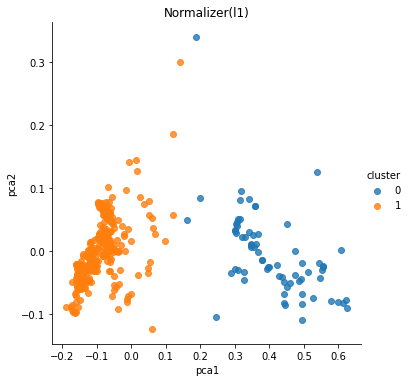

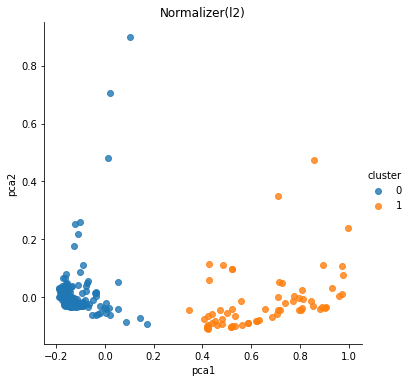

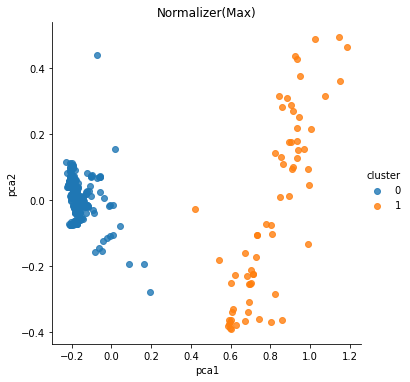

In [ ]:
# KMeans with PCA
normalizer = [StandardScaler(), MinMaxScaler(), Normalizer()]
norm_list = ['l1','l2','max']
title = ['StdScaler','MinMaxScaler','Normalizer(l1)','Normalizer(l2)','Normalizer(Max)']
transform = []

for i in normalizer:
  if i == normalizer[-1]:
    for j in norm_list:
      scaler = Normalizer(norm=j)
      X = scaler.fit_transform(xTrain)
      transform.append(pca(X,kmeans(X)))
      
  else:
      scaler = i
      X = scaler.fit_transform(xTrain)
      transform.append(pca(X,kmeans(X)))

transform


for index, i in enumerate(transform, start=0):
  plot_normalizer_pca(i, title=title[index]) 

## Agglomerative (building)

Start with each sample as it's own cluster

Calculate distance/similarity between clusters

Combine and merge

Repeat

In [ ]:
agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(X)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:585: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data = data[cols]


IndexError: ignored

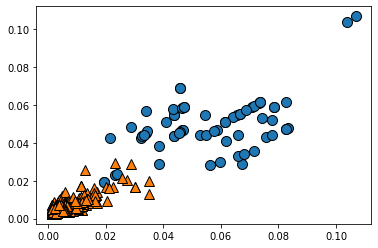

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)

# def plot_normalizer(pca_means, title):
#   fig = sns.lmplot(x="pca1", y="pca2", data=pca_means, hue="cluster", fit_reg=False)
#   plt.title(title)
#   plt.show()


fig = sns.lmplot(x="pca1", y="pca2", data=assignment, hue="cluster", fit_reg=False)

# plt.legend(["cluster 0", "cluster 1"], loc="best")

# plt.xlabel("attr 0")

# plt.ylabel("attr 1")

plt.show()

## How many clusters are optimal?


#### Method 1 : Change in Objective Functions (Drastic Change)

Obj. Func.: 70.66320320545563
Obj. Func.: 17.9824623434801
Obj. Func.: 12.624945083384718
Obj. Func.: 10.314087616084908
Obj. Func.: 8.911747915235837
Obj. Func.: 7.607217386860254
Obj. Func.: 6.910324767196701
Obj. Func.: 6.263329468133901
Obj. Func.: 5.8626880308321


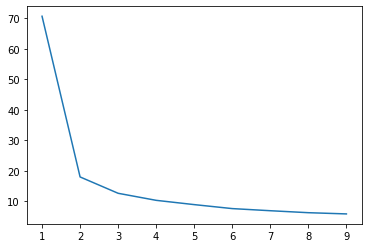

In [ ]:
clusterRange = range(1,10)
objFuncs = []

for i in clusterRange:
  kmeans = KMeans(n_clusters=i).fit(X)
  print("Obj. Func.:", kmeans.inertia_)
  objFuncs.append(kmeans.inertia_)

plt.plot(clusterRange, objFuncs)

#### Method 2: Variance Explained vs. # of clusters

Text(0.5, 1.0, 'Variance vs Number of Clusters')

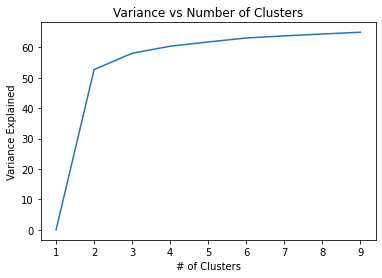

In [ ]:
# Pick the one where the variance stops changing abruptly

clusterRange = range(1,10)

# First the model for each n_clusters
kMeansModels = [KMeans(n_clusters=k).fit(X) for k in clusterRange]

# Same as
# kMeansModels = []
# for k in clusterRange
#   kMeansModels.append(KMeans(n_clusters = k).fit(X))

centroids = [x.cluster_centers_ for x in kMeansModels]

# Calculate the distant from each point to each cluster center
euclid = [cdist(X, centroid, 'euclidean') for centroid in centroids]
dist = [np.min(ke, axis=1) for ke in euclid]

# Total Within Cluster Sum of Squares
wcss = [sum(d**2) for d in dist]

# Total sum of Squares
tss = sum(pdist(X)**2/X.shape[0])

# Between cluster sum of squares
bss = tss - wcss

plt.plot(list(clusterRange), bss)
plt.xlabel('# of Clusters')
plt.ylabel('Variance Explained')
plt.title('Variance vs Number of Clusters')

#### Method 3: Within Cluster SSE

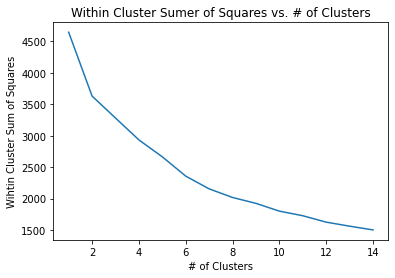

In [ ]:
# Elbow plot: At what value of k, the distance between the mean of a cluster and the other data points in the cluster is at its lowest

plt.plot(list(clusterRange), wcss)
plt.xlabel('# of Clusters')
plt.ylabel("Wihtin Cluster Sum of Squares")
plt.title("Within Cluster Sumer of Squares vs. # of Clusters")

plt.show()

#### Method 3.1 Elbow plot

In [ ]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
  kmeans = KMeans(n_clusters=k)
  model = kmeans.fit(X)
  sum_of_squared_distances.append(kmeans.inertia_)

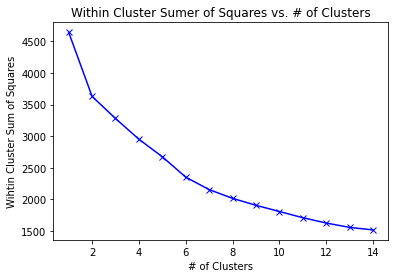

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('# of Clusters')
plt.ylabel("Wihtin Cluster Sum of Squares")
plt.title("Within Cluster Sumer of Squares vs. # of Clusters")

plt.show()

#### Method #4: Silhouette Score

In [ ]:
# Pick Peak Coefficient

# ss = []

# k_range = range(1,15)

# k_means = [KMeans(n_clusters=k).fit(X) for k in k_range]
# sscores = [silhouette_score(X, kmean.labels_) for kmean in k_means]

# plt.plot(list(k_range), sscores, 'r*-.')
# plt.show()

In [ ]:
# Silhouette coefficient
labels = kmeans.labels_

metrics.silhouette_score(X, labels, metric='euclidean')

0.14191941593900664

In [ ]:
# CH Score
metrics.calinski_harabasz_score(X, labels)

48.859232639631536

In [ ]:
# k=7 is the optimal number of clusters
kmeans_7 = KMeans(n_clusters=4)
model = kmeans_7.fit(X)
y_hat_7 = kmeans_7.predict(X)
labels_7 = kmeans_7.labels_

print('Silhouette coefficient:', metrics.silhouette_score(X, labels_7, metric = 'euclidean'))
print('CV score:', metrics.calinski_harabasz_score(X, labels_7))

Silhouette coefficient: 0.18744438362261145
CV score: 74.99656594476691


In [ ]:
kmeans.cluster_centers_

array([[-1.39602834e-01, -5.58605845e-02,  8.40809461e-02,
         2.41200717e+00,  9.82802644e-01, -3.44956885e-01,
        -1.67126748e-01,  1.02525917e+00,  6.36596916e-02,
        -1.04325267e-01, -1.34138694e-01,  4.17910003e-01],
       [ 2.57018593e-02,  1.05845231e-01, -1.32622859e+00,
        -1.42706340e+00, -1.95760816e+00, -1.17604554e+00,
        -1.38483944e+00,  6.23482858e-01, -3.03837660e-01,
        -3.92061086e-02, -1.33835947e-01, -2.07257398e+00],
       [-1.17990380e+00, -6.45368709e-01,  1.97096477e-01,
         2.18993470e-01,  5.68820981e-01, -1.49990367e-01,
         5.42290571e-01, -3.26521281e-01, -7.98283940e-01,
        -1.04325267e-01, -1.67494485e-02,  4.47466138e-01],
       [ 1.21804246e+00,  1.38249427e+00,  5.69647943e-01,
         6.58170858e-01,  2.77157340e-01,  5.00758125e-01,
         1.10604669e+00, -7.37124925e-01, -2.74402753e-01,
        -1.04325267e-01, -5.83247709e-02,  1.83451234e-01],
       [-1.21301243e-01,  6.09912577e-01, -1.1759944

In [ ]:
fig = sns.lmplot(x='pcal',y='pca2', data=kmeans_7, hue='cluster', fit_reg=False)
plt.show()

TypeError: ignored

In [ ]:
#function that creates a dataframe with a column for cluster number
def pd_centers(cols_of_interest, centers):
  colNames = list(cols_of_interest)
  colNames.append('prediction')

# Zip with a column called 'prediction' (index)
  Z = [np.append(A, index) for index, A in enumerate(centers)]

# Convert to pandas data frame for plotting
  P = pd.DataFrame(Z, columns=colNames)
  P['prediction'] = P['prediction'].astype(int)
  return P

cols_of_interest = x.columns
centers = model.cluster_centers_

P = pd_centers(cols_of_interest, centers)
P

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_int,day_int,prediction
0,0.163560,0.364411,-2.599537,-1.186397,-0.477240,-1.393730,-1.409174,0.252667,1.304033,-0.079231,1.215053,-0.461603,0
1,-0.542343,-0.281441,0.135711,0.140484,0.549496,-0.154925,0.318631,-0.258795,-0.462833,-0.079231,0.471796,-0.956578,1
2,0.075381,0.123175,-0.646854,-1.329440,-2.015509,-0.623115,-1.095670,0.016880,0.448553,-0.069237,-2.105213,0.110535,2
3,1.191226,0.908185,0.344405,0.248675,0.218982,0.485478,0.585782,-0.366831,-0.252951,-0.079231,0.197522,0.262011,3
4,-0.731808,-0.667285,0.459660,0.342796,0.436522,0.358959,0.571812,-0.447528,-0.199974,-0.079231,0.333717,0.696391,4
5,0.081336,-0.079932,0.052098,0.621054,0.452805,0.008280,-0.627136,1.454986,0.423129,0.113935,0.321632,-0.145774,5
6,1.030653,0.588905,1.163381,1.133328,0.484437,1.106905,1.475259,1.138747,0.508955,18.790050,0.180703,-0.435656,6


## Agglomerative Clustering

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(xTrain)
X_norm = normalize(X)

In [ ]:
ac = clt = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=3)
model = ac.fit(X)

In [ ]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Rescaling

Rescaling
  - MinMaxScaler
  - StandardScaler

Standardization
  - Standarize all data on Gaussian Distribution: 

Normalizing

Link: machinelearningmastery.com

In [ ]:
# PCA

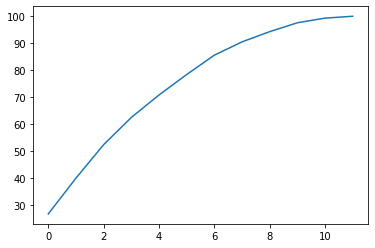

In [ ]:
pca = PCA().fit(X)

# The amount of variance that each principal component explains
var = pca.explained_variance_ratio_

# Cumulative Variance explained
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var1)

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)

# Variable reduction: Break large for smaller dimensions
tForest = pd.DataFrame(pca.fit_transform(X))
tForest

,0,1,2
0,-302.355844,112.592804,-5.222615
1,449.362846,22.032746,13.588285
2,-150.086735,-47.620495,22.734340
3,-143.979105,-91.369606,44.362416
4,-105.881824,-73.178012,29.991142
...,...,...,...
512,-126.358235,-13.439353,-16.942165
513,-152.867968,33.000561,-6.177859
514,-126.243159,-12.549314,2.797100
515,-198.741641,-45.402396,-6.186244


# Hierarchical clustering

In [ ]:
import scipy.cluster.hierarchy as h

In [ ]:
forest = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
month_int = {
    'jan' : 1,
    'feb' : 2,
    'mar' : 3,
    'apr' : 4,
    'may' : 5,
    'jun' : 6,
    'jul' : 7,
    'aug' : 8,
    'sep' : 9,
    'oct' : 10,
    'nov' : 11,
    'dec' : 12
}

forest["month_int"] = forest['month'].map(month_int) 
forest = forest.sort_values(['month_int']).reset_index(drop=True)

day_int = {
    'sun' : 1,
    'mon' : 2,
    'tue' : 3,
    'wed' : 4,
    'thu' : 5,
    'fri' : 6,
    'sat' : 7
}

forest["day_int"] = forest['day'].map(day_int)
forest = forest.sort_values(['day_int']).reset_index(drop=True)
forest = forest.drop(['month','day'], axis=1)
forest

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_int,day_int
0,1,3,91.0,276.3,825.1,7.1,21.9,43,4.0,0.0,70.76,9,1
1,2,2,89.3,51.3,102.2,9.6,5.5,59,6.3,0.0,0.00,3,1
2,4,4,89.7,90.0,704.4,4.8,17.8,64,1.3,0.0,0.00,9,1
3,2,4,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0,0.00,9,1
4,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,6,5,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,9,7
513,7,4,91.8,170.9,692.3,13.7,23.7,40,1.8,0.0,1.38,8,7
514,2,2,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,9,7
515,6,5,92.2,102.3,751.5,8.4,19.7,35,1.8,0.0,0.00,9,7


In [ ]:
X = forest.drop(['area'], axis=1)
Y = forest['area']

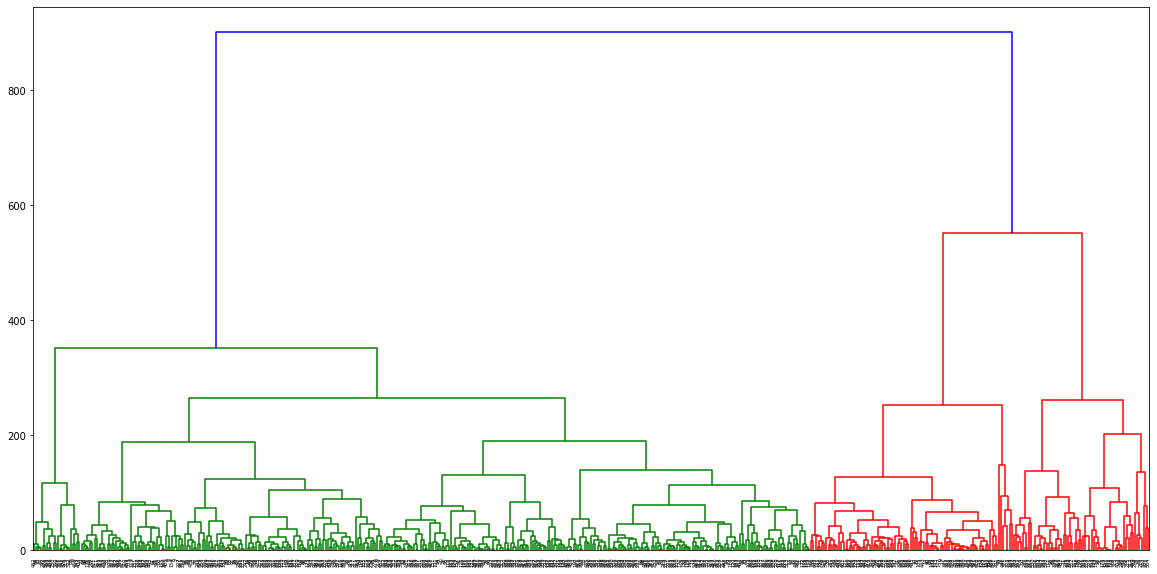

In [ ]:
forestComplete = h.complete(X)

fig = plt.figure(figsize = (20,10))
dn = h.dendrogram(forestComplete)
plt.show()

Agglomerative (building)
  - Start with each sample as it's own luster
  - Calculate distance/similarity between clusters
  - Combine and merge
  - Repeat



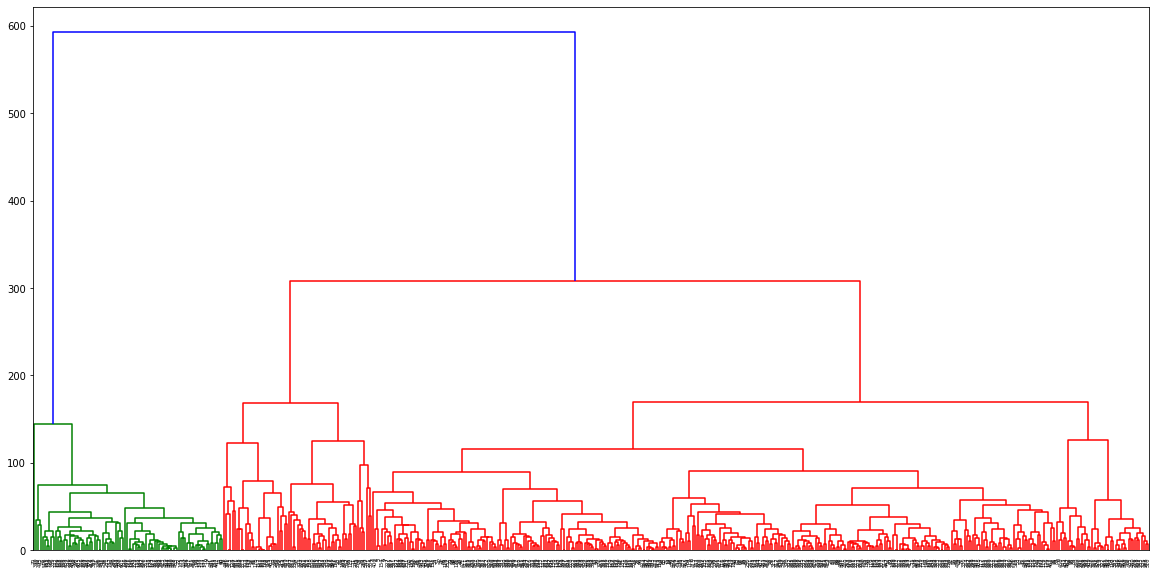

In [ ]:
forestAverage = h.average(X)

fig = plt.figure(figsize = (20,10))
dn = h.dendrogram(forestAverage)
plt.show()

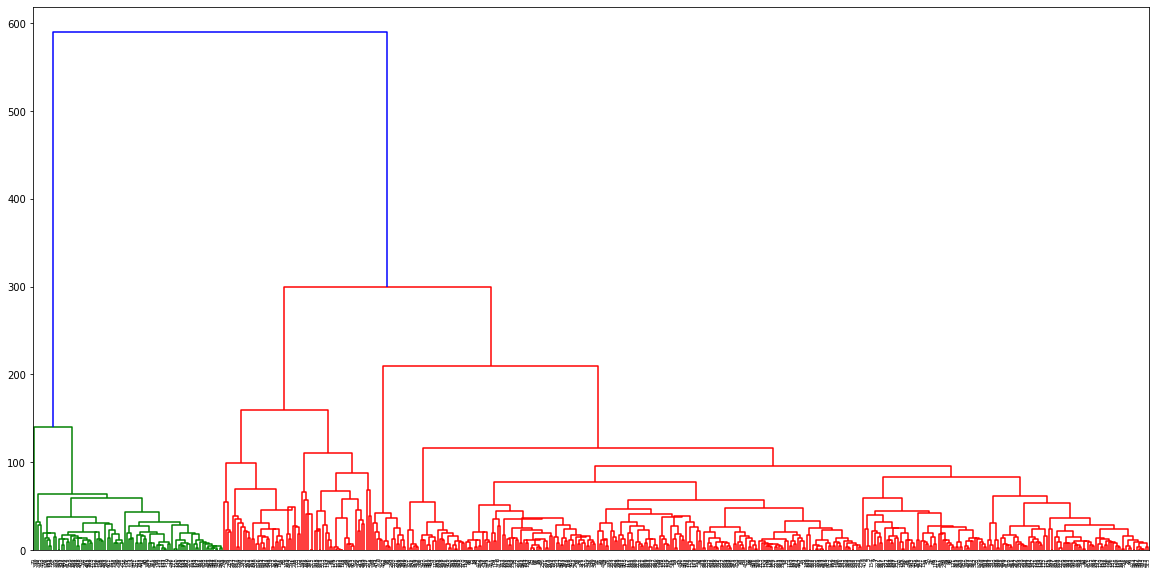

In [ ]:
forestCentroid = h.centroid(X)

fig = plt.figure(figsize = (20,10))
dn = h.dendrogram(forestCentroid)
plt.show()

In [ ]:
# def plot_dendogram(mode, **kwargs):
  # children = model.

In [ ]:
# GMM (GaussianMixture models)
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

labels = gmm.predict(X)
forest["labels"] = labels

d0 = forest[forest["labels"]==0]
d1 = forest[forest["labels"]==1]
d2 = forest[forest["labels"]==2]

print(gmm.lower_bound_)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_int,day_int,labels
0,1,3,91.0,276.3,825.1,7.1,21.9,43,4.0,0.0,70.76,9,1,0
2,4,4,89.7,90.0,704.4,4.8,17.8,64,1.3,0.0,0.00,9,1,0
8,2,4,94.2,122.3,589.9,12.9,15.4,66,4.0,0.0,10.13,8,1,0
11,7,4,93.7,101.3,423.4,14.7,18.2,82,4.5,0.0,2.21,7,1,0
12,2,4,91.8,175.1,700.7,13.8,22.4,54,7.6,0.0,2.87,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,7,5,92.8,73.2,713.0,22.6,19.3,38,4.0,0.0,0.00,9,7,0
512,6,5,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,9,7,0
513,7,4,91.8,170.9,692.3,13.7,23.7,40,1.8,0.0,1.38,8,7,0
514,2,2,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,9,7,0
